In [40]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D
# from tensorflow.keras.applications import EfficientNetB0
from keras.optimizers import Adam,RMSprop

from keras.applications.resnet50 import ResNet50
from keras.layers import Dense,Dropout,Activation,Flatten
from keras import Model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import cv2
import os
import itertools 

In [12]:
DATADIR  =  '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/COVID-19_Radiography_Dataset/'

In [13]:
#split de datagen into 70% and 30%, train and test
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255, shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

#classes=["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]
classes=["COVID",  "Normal"]

In [14]:
# train_path =  '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/basedata/train/'
# train_dataset =  train.flow_from_directory(directory=train_path, 
#                                               target_size=(200, 200),
#                                               class_mode='categorical',
#                                               shuffle=True, classes=classes,
#                                               batch_size=2)
# val_path =  '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/basedata/validation/'
# validation_dataset =  validation.flow_from_directory(directory=val_path, 
#                                               target_size=(200, 200),
#                                               class_mode='categorical',
#                                               shuffle=True, classes=classes,
#                                               batch_size=2)


num_classes = len(classes)
# print(num_classes)
batch_size=32


#split de datagen into 70% and 30%, train and test
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2,\
                             height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, \
                             fill_mode="nearest", rescale=1./255, validation_split=0.3)


#load the images to training

train_gen = datagen.flow_from_directory(directory=DATADIR, 
                                              target_size=(200, 200),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")
#load the images to test
test_gen = datagen.flow_from_directory(directory=DATADIR, 
                                              target_size=(200, 200),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")

Found 9667 images belonging to 2 classes.
Found 4141 images belonging to 2 classes.


In [16]:
train_gen.class_indices

{'COVID': 0, 'Normal': 1}

In [17]:
train_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

#### We are building a simple Neural Network for Classification

In [18]:
model =  tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
#     
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [19]:
model.compile(loss='categorical_crossentropy', metrics=["accuracy"],optimizer=RMSprop(lr=0.03))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [21]:
model_fit  = model.fit(train_gen,steps_per_epoch=3, epochs=30,validation_data=test_gen)

Train for 3 steps, validate for 130 steps
Epoch 1/30
3/3 [==============================] - 164s 55s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 140s 47s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 140s 47s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 122s 41s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 121s 40s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 119s 40s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 123s 41s/step - loss

### We are taking a look at some the test images

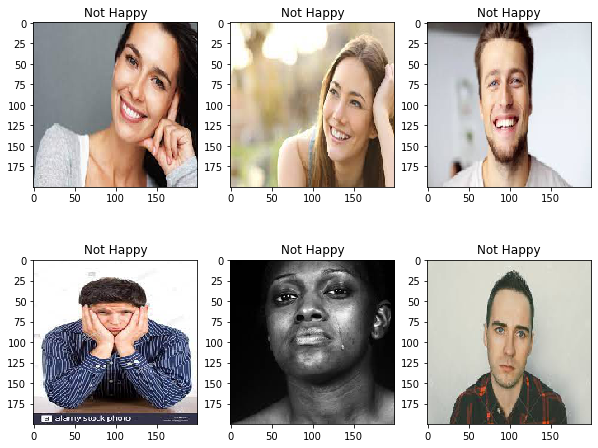

In [78]:

dir_path =  '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/basedata/test/'
k =  0
plt.figure(figsize=(10,8))
for i in os.listdir(dir_path):    
    if(i.endswith('.jpg')):
        k =  k + 1
        plt.subplot(2,3,k)
        img  =  image.load_img(dir_path + i,target_size=(200,200,3))
        X  =  image.img_to_array(img)
        X  = np.expand_dims(X,axis=0)
        images =  np.vstack([X])
        pred =  model.predict(images)
        plt.imshow(img)
        if(pred  == 0):
            plt.title('Happy')
        else:
            plt.title('Not Happy')

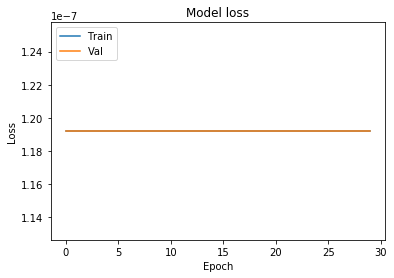

In [22]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

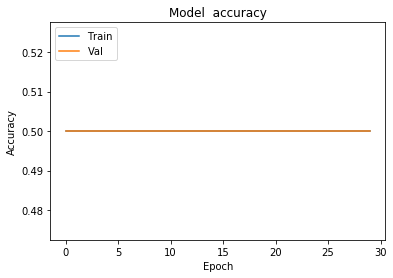

In [23]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model  accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [39]:
# model1  = tf.keras.applications.ResNet152V2(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )


img_height =  200
img_width  =  200
n_channels = 1
base_model = ResNet50(weights= None, include_top=False, \
                                            input_shape= (img_height,img_width,n_channels))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)